In [467]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# load data 
data = pd.read_excel('ST2187_coursework_dataset_2020-21.xlsx')

# delete unnecessary columns
bad_columns = ['Row ID', 'Order ID', 'Customer Name', 
               'State', 'Postal Code', 'Product Name', 'Segment',
               'Ship Date', 'Ship Mode', 'Region']

data.drop(bad_columns, axis=1, inplace=True)

# sort by date
data.sort_values('Order Date', inplace=True)
data = data.reset_index(drop=True)

# add new columns
data['isProfitPos'] = data['Profit'].apply(lambda x: 1 if x > 0 else 0)

# devide by years
df11 = data[data['Order Date'] < '2012-01-01']
df12 = data[(data['Order Date'] > '2011-12-31') & (data['Order Date'] < '2013-01-01')]
df13 = data[(data['Order Date'] > '2012-12-31') & (data['Order Date'] < '2014-01-01')]
df = data[data['Order Date'] > '2013-12-31']

In [468]:
data['year'] = data['Order Date'].apply(lambda x: int(x.strftime("%Y")))
# data.to_excel('data.xlsx')

In [263]:
# Sales ABC
def ABCD(p):
    if p < 50:
        return 'A'
    elif p < 80:
        return 'B'
    elif p < 95:
        return 'C'
    return 'D'


def ABCD_analysis(data_frame, col):
    df = data_frame.copy()
    
    total_sum = df[col].sum()
    df['share'] = 100 * df[col] / total_sum
    df = df.sort_values('share', ascending=False)
    df['cumsum'] = df['share'].cumsum()
    data_frame[f'{col}_ABCD'] = df['cumsum'].apply(ABCD)
    
    

# ABCD_analysis(df, 'Sales')
# ABCD_analysis(df, 'Profit')

df.head()

,Order Date,City,Country,Market,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,isProfitPos
33759,2014-01-01,Hangzhou,China,APAC,OFF-LA-10003396,Office Supplies,Labels,39.8700,3,0.00,8.7300,5.62,High,1
33760,2014-01-01,Melbourne,Australia,APAC,OFF-EN-10002035,Office Supplies,Envelopes,203.3100,6,0.10,13.4100,16.61,Medium,1
33761,2014-01-01,Pantin,France,EU,TEC-MA-10001777,Technology,Machines,677.4075,3,0.15,-111.6225,104.69,High,0
33762,2014-01-01,Anaheim,United States,US,TEC-PH-10002563,Technology,Phones,302.3760,3,0.20,22.6782,24.99,Medium,1
33763,2014-01-01,Jacksonville,United States,US,OFF-PA-10002250,Office Supplies,Paper,23.4800,5,0.20,8.2180,1.55,Medium,1


In [270]:
df11.to_excel('df11.xlsx')
df12.to_excel('df12.xlsx')
df13.to_excel('df13.xlsx')

## Analysis

#### 1. There is a correlation between Discount and sign of Profit
    1. Corr (Table)
    2. Dinamics (Plot)
#### 2. Discount analysis
    1. Subcategories (Hist)
    2. Categories (Hist)
    3. Markets (Map)
#### 3. Most critical Market1 - EMEA
    1. Share in the world (Pie)
    2. Subcategories - tables (hist)
    3. Countries (Map/Hist)
#### 4. Most critical Market2 - 
#### 5. We may increase Profit by at least 30% if not serving some regions. 


## 1 There is a correlation between Discount and sign of Profit

In [203]:
df[['Profit', 'isProfitPos', 'Discount']].corr().style.background_gradient(cmap='coolwarm').format('{0:,.3f}')

,Profit,isProfitPos,Discount
Profit,1.000,0.329,-0.313
isProfitPos,0.329,1.000,-0.797
Discount,-0.313,-0.797,1.000


## 2 Discount analysis

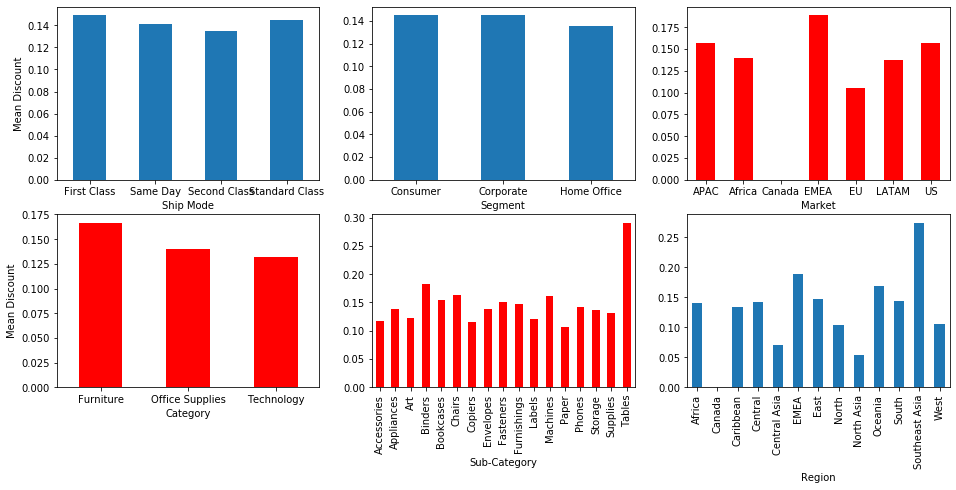

In [260]:
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

df.groupby('Ship Mode')['Discount'].mean().plot.bar(ax=axs[0, 0], ylabel='Mean Discount', rot=0);
df.groupby('Segment')['Discount'].mean().plot.bar(ax=axs[0, 1], rot=0);
df.groupby('Market')['Discount'].mean().plot.bar(ax=axs[0, 2], rot=0, color='red');
df.groupby('Category')['Discount'].mean().plot.bar(ax=axs[1, 0], ylabel='Mean Discount', rot=0, color='red');
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1, 1], rot=90, color='red');
df.groupby('Region')['Discount'].mean().plot.bar(ax=axs[1, 2], rot=90);

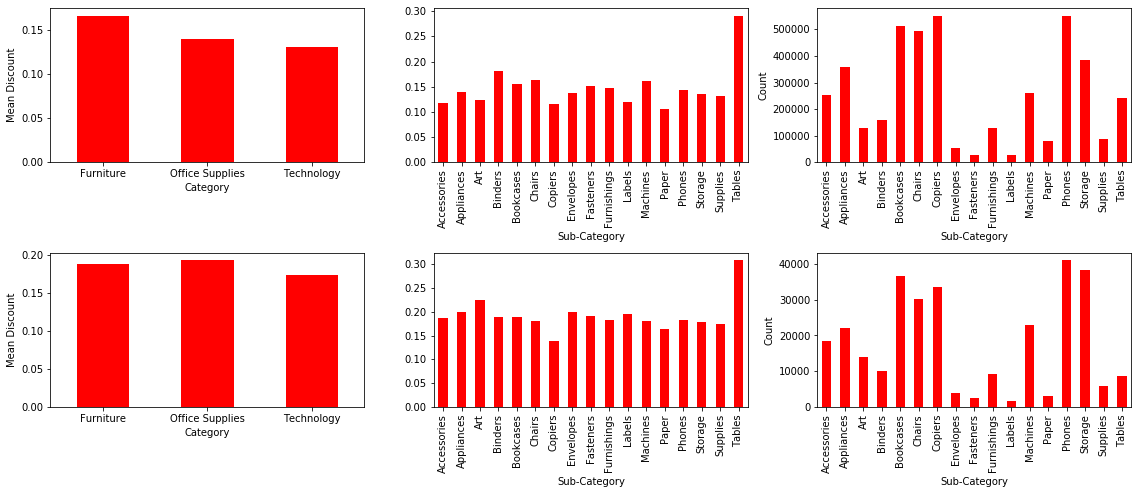

In [290]:
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

df.groupby('Category')['Discount'].mean().plot.bar(ax=axs[0, 0], ylabel='Mean Discount', rot=0, color='red');
df.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[0, 1], rot=90, color='red');
df.groupby('Sub-Category')['Sales'].sum().plot.bar(ax=axs[0, 2], ylabel='Count', rot=90, color='red');
emea.groupby('Category')['Discount'].mean().plot.bar(ax=axs[1, 0], ylabel='Mean Discount', rot=0, color='red');
emea.groupby('Sub-Category')['Discount'].mean().plot.bar(ax=axs[1, 1], rot=90, color='red');
emea.groupby('Sub-Category')['Sales'].sum().plot.bar(ax=axs[1, 2], ylabel='Count', rot=90, color='red');
plt.tight_layout()

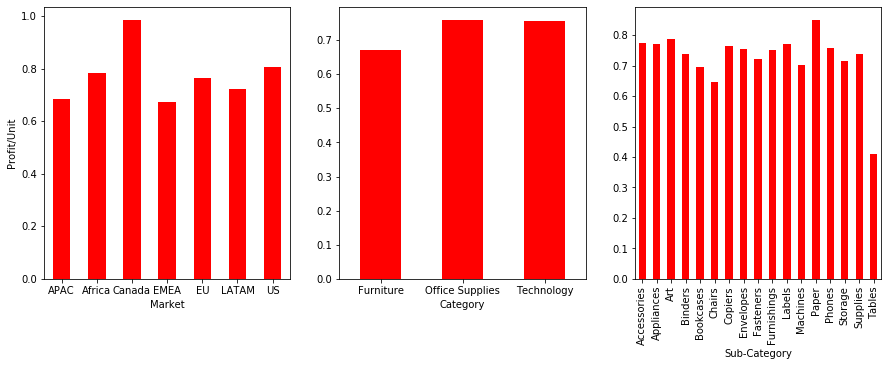

In [265]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df.groupby('Market')['isProfitPos'].mean().plot.bar(ax=axs[0], ylabel='Profit/Unit', rot=0, color='red');
df.groupby('Category')['isProfitPos'].mean().plot.bar(ax=axs[1], rot=0, color='red');
df.groupby('Sub-Category')['isProfitPos'].mean().plot.bar(ax=axs[2], rot=90, color='red');

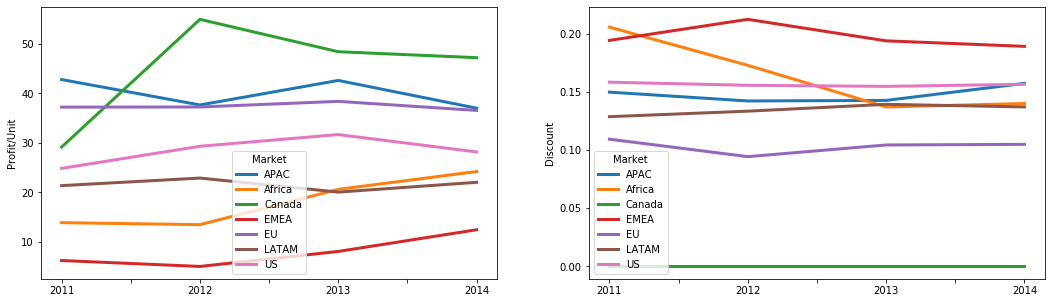

In [211]:
# Markets
market_profit_u = pd.DataFrame(df11.groupby('Market')['Profit'].mean())
market_profit_u['2012'] = df12.groupby('Market')['Profit'].mean().values
market_profit_u['2013'] = df13.groupby('Market')['Profit'].mean().values
market_profit_u['2014'] = df.groupby('Market')['Profit'].mean().values
market_profit_u.columns = ['2011', '2012', '2013', '2014']

market_disc = pd.DataFrame(df11.groupby('Market')['Discount'].mean())
market_disc['2012'] = df12.groupby('Market')['Discount'].mean().values
market_disc['2013'] = df13.groupby('Market')['Discount'].mean().values
market_disc['2014'] = df.groupby('Market')['Discount'].mean().values
market_disc.columns = ['2011', '2012', '2013', '2014']

# plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

market_profit_u.T.plot(ax=axs[0], ylabel='Profit/Unit', linewidth=3);
market_disc.T.plot(ax=axs[1], ylabel='Discount', linewidth=3);

## 3 Most critical Market1 - EMEA

In [206]:
df.groupby('Market')['Sales'].sum().astype(np.int)

Market
APAC      1209198
Africa     283036
Canada      23161
EMEA       301685
EU        1042203
LATAM      706632
US         733947
Name: Sales, dtype: int64

In [172]:
emea = df[df['Market'] == 'EMEA']
emea.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,Profit/Unit,isProfitPos
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,166.585281,2.294313,0.189067,12.479472,18.424097,5.296943,0.673109
std,346.371444,2.188384,0.283802,142.676655,43.709707,50.631050,0.469207
min,1.548000,1.000000,0.000000,-2750.280000,0.020000,-343.785000,0.000000
25%,19.080000,1.000000,0.000000,-6.948000,1.730000,-4.566000,0.000000
50%,51.930000,1.000000,0.000000,5.910000,5.290000,3.780000,1.000000
75%,158.760000,2.000000,0.600000,26.640000,16.290000,14.430000,1.000000
max,5211.120000,14.000000,0.700000,1233.000000,630.970000,311.700000,1.000000


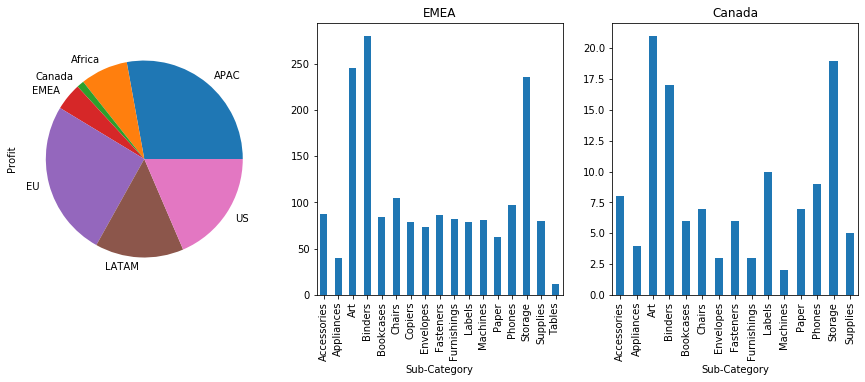

In [207]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

df.groupby('Market')['Profit'].sum().plot.pie(ax=axs[0])

emea.groupby('Sub-Category')['Sub-Category'].count().plot.bar(ax=axs[1], title='EMEA');

can = df[df['Market'] == 'Canada']
can.groupby('Sub-Category')['Sub-Category'].count().plot.bar(title='Canada');

####  Can be seen that little depends on the subcategories distribution.

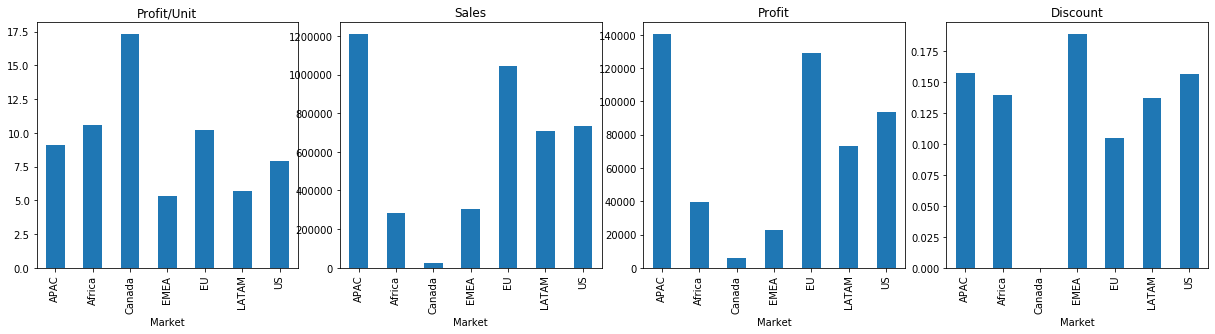

In [189]:
fig, axs = plt.subplots(1, 4, figsize=(17, 4))

plt.tight_layout()
df.groupby('Market')['Profit/Unit'].mean().plot.bar(ax=axs[0], title='Profit/Unit')
df.groupby('Market')['Sales'].sum().plot.bar(ax=axs[1], title='Sales')
df.groupby('Market')['Profit'].sum().plot.bar(ax=axs[2], title='Profit')
df.groupby('Market')['Discount'].mean().plot.bar(ax=axs[3], title='Discount')

In [440]:
# растут ли продажи за 4 года ?
# сравнить численность населения
"""
APAC - 4.3bn
Africa - 1.216 bn
Canada - 34, 34, 35, 35 mln
EMEA - 2bn
EU - 439, 440, 441, 442 mln
LATAM - 597, 603, 609, 616 mln
US - 311, 313, 315, 318 mln
"""

markets = list(df['Market'].unique())
population = [4.3*10**9, 442*10**6, 318*10**6, 1.21*10**9,
              2*10**9, 616*10**6, 35*10**6]

wages = pd.read_excel('wages.xlsx')
wages = wages[wages['Country'].isin(data['Country'])]
wages['Country'].nunique()
avg = wages.groupby('Country')['Wage'].mean()

wages = pd.DataFrame({'Country': list(avg.index), 'wage':list(avg.values)})
meanwage = wages['wage'].mean()
wages['Market'] = [''] * len(wages)


for i in range(len(wages)):
    c1 = wages.iloc[i, 0]
    m = None
    for j in range(len(data)):
        c2 = data.iloc[j, 2]
        if c1 == c2:
            m = data.iloc[j, 3]
            break
    wages.iloc[i, 2] = m
    
wages

,Country,wage,Market
0,Afghanistan,84.987778,APAC
1,Albania,200.421000,EMEA
2,Algeria,216.560000,Africa
3,Angola,80.385000,Africa
4,Argentina,514.911000,LATAM
...,...,...,...
98,United States,1256.670000,US
99,Uzbekistan,47.564286,EMEA
100,Venezuela,NaN,LATAM
101,Vietnam,131.100000,APAC


In [420]:
# wages = wages.dropna()
# wages = wages.groupby('Market')['wage'].mean()
wages

Market
APAC       471.158234
Africa     125.069787
Canada    1478.729000
EMEA       335.453893
EU        1806.227815
LATAM      315.980889
US        1256.670000
Name: wage, dtype: float64

In [424]:
mark = pd.DataFrame({'Market':markets, 'Population':population})
mark = mark.sort_values(by='Market')
mark['min_wage'] = wages.values

In [425]:
mark

,Market,Population,min_wage
0,APAC,4.300000e+09,471.158234
3,Africa,1.210000e+09,125.069787
6,Canada,3.500000e+07,1478.729000
4,EMEA,2.000000e+09,335.453893
1,EU,4.420000e+08,1806.227815
5,LATAM,6.160000e+08,315.980889
2,US,3.180000e+08,1256.670000


In [432]:
africa = df[df['Market']=='Africa']
africa.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,isProfitPos
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,174.283522,2.306034,0.139963,24.218885,18.523972,0.782635
std,364.569715,2.137437,0.279265,151.286744,45.187351,0.412580
min,1.161000,1.000000,0.000000,-1472.376000,0.050000,0.000000
25%,19.557000,1.000000,0.000000,1.050000,1.720000,1.000000
50%,52.920000,1.000000,0.000000,7.890000,5.040000,1.000000
75%,164.280000,2.000000,0.000000,28.252500,15.887500,1.000000
max,5301.240000,14.000000,0.700000,2597.280000,763.380000,1.000000


In [433]:
emea.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost,isProfitPos
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,166.585281,2.294313,0.189067,12.479472,18.424097,0.673109
std,346.371444,2.188384,0.283802,142.676655,43.709707,0.469207
min,1.548000,1.000000,0.000000,-2750.280000,0.020000,0.000000
25%,19.080000,1.000000,0.000000,-6.948000,1.730000,0.000000
50%,51.930000,1.000000,0.000000,5.910000,5.290000,1.000000
75%,158.760000,2.000000,0.600000,26.640000,16.290000,1.000000
max,5211.120000,14.000000,0.700000,1233.000000,630.970000,1.000000


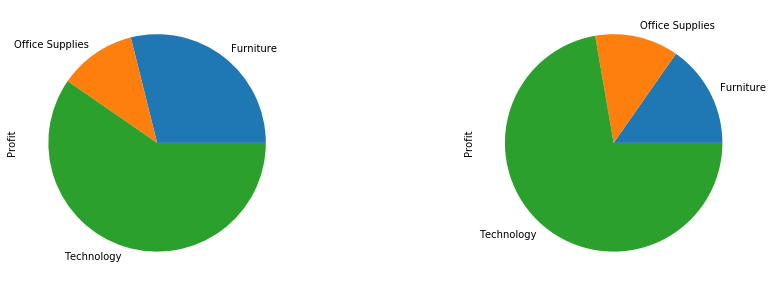

In [436]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
africa.groupby('Category')['Profit'].mean().plot.pie(ax=axs[0])
emea.groupby('Category')['Profit'].mean().plot.pie(ax=axs[1])

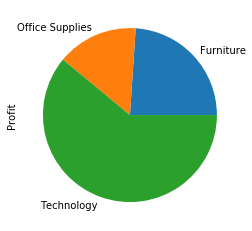

In [437]:
df.groupby('Category')['Profit'].mean().plot.pie()

In [447]:
wages[wages['Country'].isin(['Turkey', 'Lithuania', 'United Arab Emirates', 'Tajikistan',
                           'Turkmenistan', 'United Arab Emirates', 'Kazakhstan'])]

,Country,wage,Market
46,Kazakhstan,112.550000,EMEA
52,Lithuania,400.097000,EMEA
88,Tajikistan,39.375556,EMEA
94,Turkey,495.616000,EMEA


In [448]:
wages_n = [112, 290, 39, 495, 152, 1023, 91]
wages_c = ['Kazakhstan', 'Lithuania', 'Tajikistan', 'Turkey',
           'Turkmenistan', 'United Arab Emirates', 'Yemen']
wages_p = [17.2, 2.9, 8.2, 76.6, 5.5, 9.2, 25.8]

neg = pd.DataFrame({'Country':wages_c, 'Minwage':wages_n, 'Population':wages_p})
neg

,Country,Minwage,Population
0,Kazakhstan,112,17.2
1,Lithuania,290,2.9
2,Tajikistan,39,8.2
3,Turkey,495,76.6
4,Turkmenistan,152,5.5
5,United Arab Emirates,1023,9.2
6,Yemen,91,25.8


In [462]:
neg['Discount'] = neg['Country'].apply(lambda x: data.groupby('Country')['Discount'].mean()[x])
neg['Sales'] = neg['Country'].apply(lambda x: data.groupby('Country')['Sales'].sum()[x])
neg['orders'] = neg['Country'].apply(lambda x: data.groupby('Country')['Discount'].count()[x])
neg['SalesShare'] = neg['Sales'].apply(lambda x: x / emea['Sales'].sum())
neg['PopulationShare'] = neg['Population'].apply(lambda x: x / (2*10**3))
neg

,Country,Minwage,Population,Discount,Sales,orders,SalesShare,PopulationShare
0,Kazakhstan,112,17.2,0.7,4605.444,101,0.015266,0.00860
1,Lithuania,290,2.9,0.7,6724.332,50,0.022289,0.00145
2,Tajikistan,39,8.2,0.7,242.784,3,0.000805,0.00410
3,Turkey,495,76.6,0.6,108507.948,1378,0.359672,0.03830
4,Turkmenistan,152,5.5,0.7,2027.061,25,0.006719,0.00275
5,United Arab Emirates,1023,9.2,0.7,744.120,14,0.002467,0.00460
6,Yemen,91,25.8,0.7,2465.712,30,0.008173,0.01290


In [455]:
emea['Sales'].sum()

301685.94299999997

In [463]:
neg.to_excel('negative.xlsx')

In [466]:
data['Discount'].mean()

0.14290754533046662

In [465]:
mark

,Market,Population,min_wage
0,APAC,4.300000e+09,471.158234
3,Africa,1.210000e+09,125.069787
6,Canada,3.500000e+07,1478.729000
4,EMEA,2.000000e+09,335.453893
1,EU,4.420000e+08,1806.227815
5,LATAM,6.160000e+08,315.980889
2,US,3.180000e+08,1256.670000


In [469]:
data[data['Country']=='Turkey'].groupby('year')['Customer ID'].nunique()

year
2011    102
2012    137
2013    163
2014    206
Name: Customer ID, dtype: int64

In [ ]:
data[data['Country']=='Turkey'].groupby('year')['Customer ID'].nunique()

In [472]:
data[data['Country']=='Tajikistan'].groupby('year')['Customer ID'].nunique()

year
2011    1
2014    1
Name: Customer ID, dtype: int64

In [470]:
data[data['Market']=='EMEA'].groupby('year')['Customer ID'].nunique()

year
2011    329
2012    372
2013    471
2014    544
Name: Customer ID, dtype: int64

In [474]:
data.to_excel('data2.xlsx')